In [1]:
import glob 
import os
import matplotlib.pyplot as plt
import pims as pm
from pims import pipeline # To analyze one frame at each time
import trackpy as tp # To do the tracking
import numpy as np
import pandas as pd

# To convert to gray scale one by one each image of the video
@pipeline
def as_gray(frame):
    red = frame[:, :, 0]
    green = frame[:, :, 1]
    blue = frame[:, :, 2]
    return 0.2125 * red + 0.7154 * green + 0.0721 * blue

# Preliminar tracking

In  this script, I will develop an algorith to track the particles. 

In [2]:
directory ="/media/Carol/Magnetic/Experiments/Microfluidics_experiments/with-interaction/21_24-04-2023_Preliminar-experiments/"

filenames = [file for file in glob.glob(
    os.path.join(directory,('EXP2_2023_03_23_11_23_39_cut.avi')))]
filenames

['/media/Carol/Magnetic/Experiments/Microfluidics_experiments/with-interaction/21_24-04-2023_Preliminar-experiments/EXP2_2023_03_23_11_23_39_cut.avi']

## One frame analysis

/media/Carol/Magnetic/Experiments/Microfluidics_experiments/with-interaction/21_24-04-2023_Preliminar-experiments/EXP2_2023_03_23_11_23_39_cut.avi


/home/carolina/anaconda3/lib/python3.7/site-packages/pims/api.py:207: UserWarning: <class 'pims.pyav_reader.PyAVReaderTimed'> errored: 'NoneType' object has no attribute 'open'
  warn(message)
/home/carolina/anaconda3/lib/python3.7/site-packages/pims/api.py:207: UserWarning: <class 'pims.pyav_reader.PyAVReaderIndexed'> errored: 'NoneType' object has no attribute 'open'
  warn(message)
Exception ignored in: <function PyAVReaderIndexed.__del__ at 0x7f9d21cac830>
Traceback (most recent call last):
  File "/home/carolina/anaconda3/lib/python3.7/site-packages/pims/pyav_reader.py", line 368, in __del__
    self._container.close()
AttributeError: 'NoneType' object has no attribute 'close'


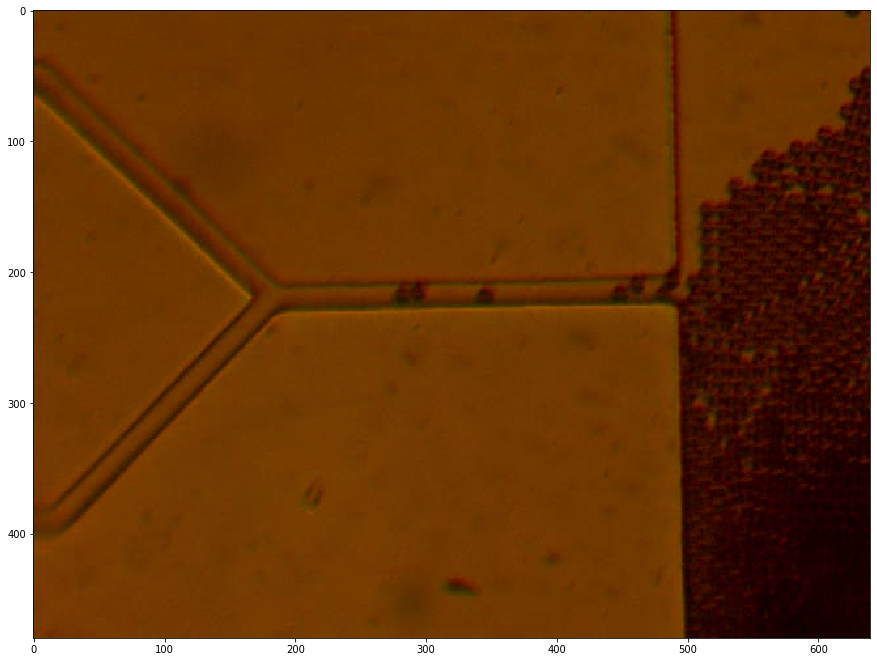

<Figure size 360x360 with 0 Axes>

In [3]:
fig, ax = plt.subplots(1,1,figsize=(15,15))

exp = 0
frame = 1000


plt.figure(figsize = (5,5))
print(filenames[exp])
fname = filenames[exp]
video = pm.open(fname)
ax.imshow(video[frame])

In [4]:
video = as_gray(video)

In [5]:
def mean_frame(video):
    
    frames = video[0]
    for i in range(1, len(video), 1):

        frames = frames + video[i]
        
    mean = frames/len(video)
    
    return mean

In [6]:
# This function 

def substraction(frame, mean):
    
    frame_sub = (mean.astype(np.int8)- video[frame].astype(np.int8))
    
    return frame_sub

In [7]:
mean = mean_frame(video)

Frame([[62.38350142, 62.39411929, 62.38875317, ..., 42.14208079,
        41.46618723, 41.36222744],
       [62.4375299 , 62.43018261, 62.42210353, ..., 41.83758495,
        40.91361604, 40.54457071],
       [62.43297467, 62.42956069, 62.33530383, ..., 42.23992358,
        40.90396485, 40.20381327],
       ...,
       [65.1352269 , 65.21114368, 65.04477881, ...,  4.68811109,
         4.66887348,  4.6496497 ],
       [65.22755236, 65.27305876, 65.19146487, ...,  4.69911647,
         4.72096063,  4.72272929],
       [65.26342909, 65.27532122, 65.19767028, ...,  4.76966536,
         4.90572711,  4.98509447]])
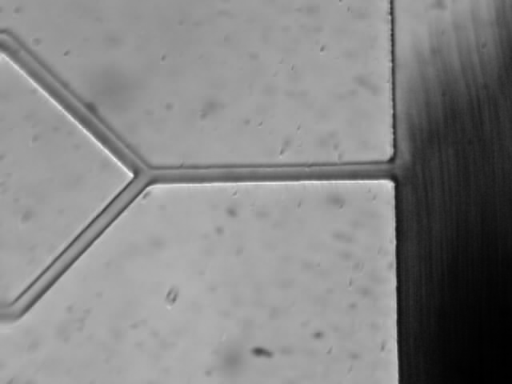

In [8]:
mean

In [9]:
import cv2
cv2.imwrite('mean0.png', mean)

True

Frame([[61.5037, 62.2191, 62.2191, ..., 58.4296, 57.5017, 59.145 ],
       [62.2191, 62.2191, 62.0066, ..., 58.6421, 58.4296, 61.2133],
       [62.0066, 62.2191, 62.2191, ..., 59.3575, 61.2133, 64.2095],
       ...,
       [64.6345, 63.9191, 64.847 , ...,  4.675 ,  3.4   ,  3.6125],
       [66.4903, 66.2778, 65.5624, ...,  4.25  ,  3.4   ,  4.0375],
       [67.9211, 67.4182, 66.9932, ...,  4.0375,  3.1875,  5.6808]])
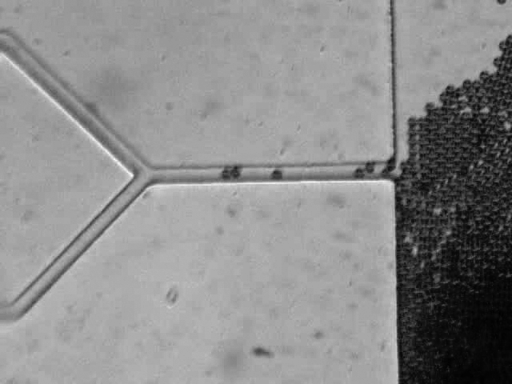

In [10]:
video[1000]

Frame([[-1, -1, -1, ..., 29, 29, 31],
       [ 0, -1, -1, ..., 30, 29, 30],
       [-1, -1, -1, ..., 28, 24, 23],
       ...,
       [ 2,  0,  0, ...,  1,  1,  1],
       [ 1,  1,  0, ...,  1,  1,  1],
       [ 2,  1,  0, ...,  1,  1,  1]], dtype=int8)
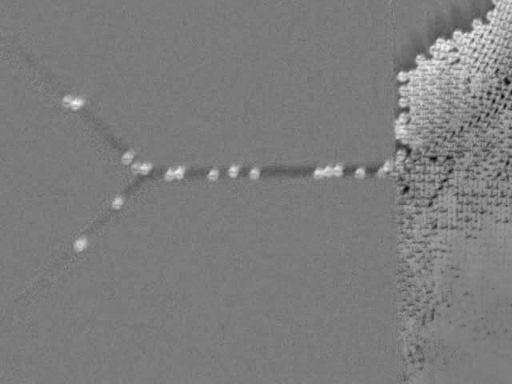

In [11]:
sub = substraction(2772, mean)
sub

In [12]:
# for i in range(0,len(video)):
#     sub = substraction(i, mean)
#     cv2.imwrite('/media/Carol/Magnetic/Experiments/Microfluidics_experiments/with-interaction/frame'+str(i)+'.png', sub)

In [13]:
# hough circle: to find circular features in image

In [14]:
diameter = 11
radius = diameter/2
radius

diameter = 2*radius

i = 0    

#@pipeline 
def locate(filename):

     return tp.locate(filename,2*round(radius)+1, threshold = 0, separation = diameter/2, minmass = 200, percentile = 0)
#     return tp.locate(filename,2*round(radius)+1, threshold = 5, noise_size = 5, separation = diameter/2, percentile = 20,
#                     characterize = False)


loc = locate(sub)
loc

y           x        mass      size       ecc     signal  \
13      5.685448  623.479530  421.558200  3.869266  0.270783  10.765370   
33     14.875079  617.607800  538.951991  3.161826  0.197474  17.258767   
39     18.304274  611.434473  599.784873  3.466609  0.304658  17.942283   
53     19.536934  630.540037  275.285877  3.799768  0.230168   9.056581   
74     23.874661  613.530827  504.434457  3.603625  0.378608  13.328553   
...          ...         ...         ...       ...       ...        ...   
1404  409.831395  511.916113  205.738173  3.841978  0.297895   5.468124   
1447  418.407643  503.410474  241.451859  3.878279  0.083073   5.468124   
1488  435.996909  515.343895  221.117272  2.913355  0.311020   7.006034   
1499  438.046527  506.044504  253.413381  3.502720  0.377139   5.980761   
1580  460.410365  512.226848  201.124443  3.777477  0.294064   4.955488   

      raw_mass        ep  frame  
13      2285.0  0.039128      0  
33      2046.0  0.043247      0  
39      1487.0  0.057373      0  
53      2041.0  0.043342      0  
74      2190.0  0.040667      0  
...        ...       ...    ...  
1404     511.0  0.133523      0  
1447     420.0  0.152380      0  
1488     104.0  0.299035      0  
1499     390.0  0.159822      0  
1580     281.0  0.194295      0  

[299 rows x 9 columns]

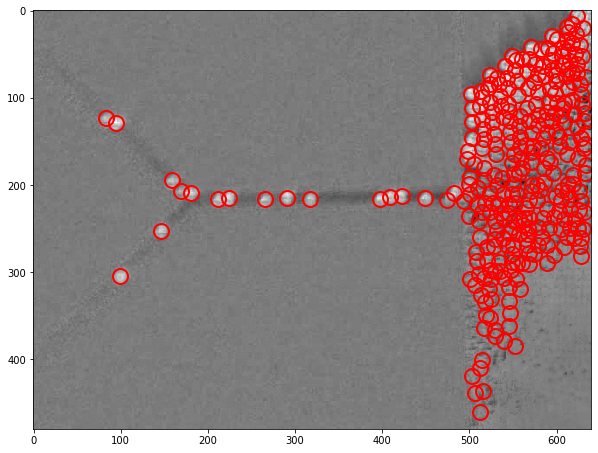

In [15]:
plt.figure(figsize=(10,10))
tp.annotate(loc, sub);

## Whole video

Until here the used method works fine. Outside the channel the tracking does not work perfectly, but inside the channel it works good. Then, I can use this parameters to do the tracking and after that filter only the ROI.

The problem with this method is that the function tp.preprocessing.bandpass() is not working for the whole video. 

<span style="color:red">I need to find the good parameters for discern two particles attached. </span>


In the following loop I apply all the filters and generate a dataframe with all the detected particles with the corresponding frame value. 

# Loop to analyze the whole video

In [22]:
%%time
diameter = 11
radius = diameter/2
radius

loc_df = []
for i in range(0,len(video), 1): # Analyze 1 frame each 30 frame
    

    sub = substraction(i, mean)

    loc = tp.locate(sub,2*round(radius)+1, threshold = 0, separation = diameter/2, minmass = 200, percentile = 0)
    
    loc['frame'] = i
    loc_df.append(loc.copy(deep = True))
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061


3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702


In [23]:
df = pd.concat(loc_df)

In [66]:
tracking = tp.link(df, 7, memory = 10, link_strategy ='recursive', neighbor_strategy= 'KDTree')

Frame 3939: 321 trajectories present.


In [67]:
tracking = tracking.set_index(["frame","particle"])

In [68]:
tracking 

y           x         mass      size       ecc  \
frame particle                                                            
0     0          27.342620  624.681661  1193.299667  4.264513  0.053922   
      1         301.214777  513.160165   332.293927  3.504995  0.373063   
      2         294.912801  501.141002   246.589848  3.653600  0.478368   
      3         291.711282  535.613174   217.615160  2.545177  0.279852   
      4         290.544394  524.678548   235.304970  2.743283  0.264827   
...                    ...         ...          ...       ...       ...   
3939  10753     104.100945  608.420686   319.244426  3.740262  0.310323   
      3196      100.776205  496.238288   942.017118  3.771445  0.280405   
      5393      102.490775  541.240672   387.189038  3.059141  0.163510   
      9827       82.910986  583.631785   365.599161  3.494739  0.328872   
      10908     449.953676  511.066176   215.898767  3.853284  0.077895   

                   signal  raw_mass        ep  
frame particle                                 
0     0         17.384813    1015.0  0.148441  
      1          8.539908     607.0  0.201336  
      2          6.862426      77.0  0.374853  
      3          9.607397    -870.0 -0.694295  
      4         10.064892    -679.0 -1.634614  
...                   ...       ...       ...  
3939  10753      9.524946     552.0  0.046459  
      3196      18.573644    2769.0  0.010759  
      5393      13.017426    2071.0  0.014192  
      9827      10.953687    1995.0  0.014703  
      10908      3.968727     489.0  0.051296  

[920229 rows x 8 columns]

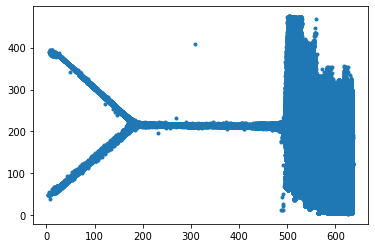

In [69]:
plt.plot(tracking.x, tracking.y,'.')

In [84]:
track = tracking

### filtering tracked data
Now I am filtering only the particles that pass through the channel 

In [85]:
track["l_travelled"] = track.groupby("particle")["x"].transform(lambda x: x - x.max())

In [86]:
track.groupby('particle')['l_travelled'].min().to_frame()

l_travelled
particle             
0           -3.289574
1           -7.640593
2           -8.758665
3           -3.328807
4           -4.327418
...               ...
10928        0.000000
10929        0.000000
10930        0.000000
10931        0.000000
10932        0.000000

[10933 rows x 1 columns]

In [87]:
particles_in_channel = (track.groupby('particle')['l_travelled'].min() > -10).to_frame()

In [88]:
particles_in_channel = particles_in_channel.loc[particles_in_channel.l_travelled, :]

# I need to filter out the false row not the true!!!!

In [89]:
particles_in_channel

l_travelled
particle             
0                True
1                True
2                True
3                True
4                True
...               ...
10928            True
10929            True
10930            True
10931            True
10932            True

[9643 rows x 1 columns]

In [90]:
passed = particles_in_channel.index.unique()

In [91]:
passed

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            10923, 10924, 10925, 10926, 10927, 10928, 10929, 10930, 10931,
            10932],
           dtype='int64', name='particle', length=9643)

In [92]:
track = track.drop(index=passed, level = 1)


In [93]:
track

y           x        mass      size       ecc  \
frame particle                                                           
0     14        277.262588  505.360585  281.664471  3.038019  0.179960   
      16        267.933186  522.565345  207.702766  2.563009  0.242350   
      20        256.602933  523.403835  270.379592  2.805200  0.266320   
      22        251.194001  599.036375  238.964930  3.496100  0.447035   
      23        248.500718  545.874102  318.569074  3.425190  0.272501   
...                    ...         ...         ...       ...       ...   
3939  9480      106.929664  552.406218  311.465721  3.325143  0.386192   
      8425      103.609056  580.032526  248.918578  3.693451  0.141590   
      436        98.701477   59.221210  784.379269  3.805853  0.204211   
      3196      100.776205  496.238288  942.017118  3.771445  0.280405   
      5393      102.490775  541.240672  387.189038  3.059141  0.163510   

                   signal  raw_mass        ep  l_travelled  
frame particle                                              
0     14        10.522387     -99.0  0.525145    -6.042013  
      16         9.607397    -301.0  0.972788    -7.568108  
      20        10.522387    -486.0  4.435464    -0.126584  
      22         7.624918    -282.0  0.900581    -0.913625  
      23         9.912393     372.0  0.253331    -9.978544  
...                   ...       ...       ...          ...  
3939  9480       8.889949    1756.0  0.016580    -9.576358  
      8425       8.572451    1319.0  0.021629    -6.333754  
      436       13.811171    2205.0  0.013373  -450.246379  
      3196      18.573644    2769.0  0.010759   -15.502621  
      5393      13.017426    2071.0  0.014192   -16.284513  

[575226 rows x 9 columns]

In [94]:
track.index.get_level_values('particle').unique()

Int64Index([   14,    16,    20,    22,    23,    26,    27,    30,    31,
               32,
            ...
            10504, 10516, 10534, 10536, 10545, 10623, 10639, 10653, 10701,
            10855],
           dtype='int64', name='particle', length=1290)

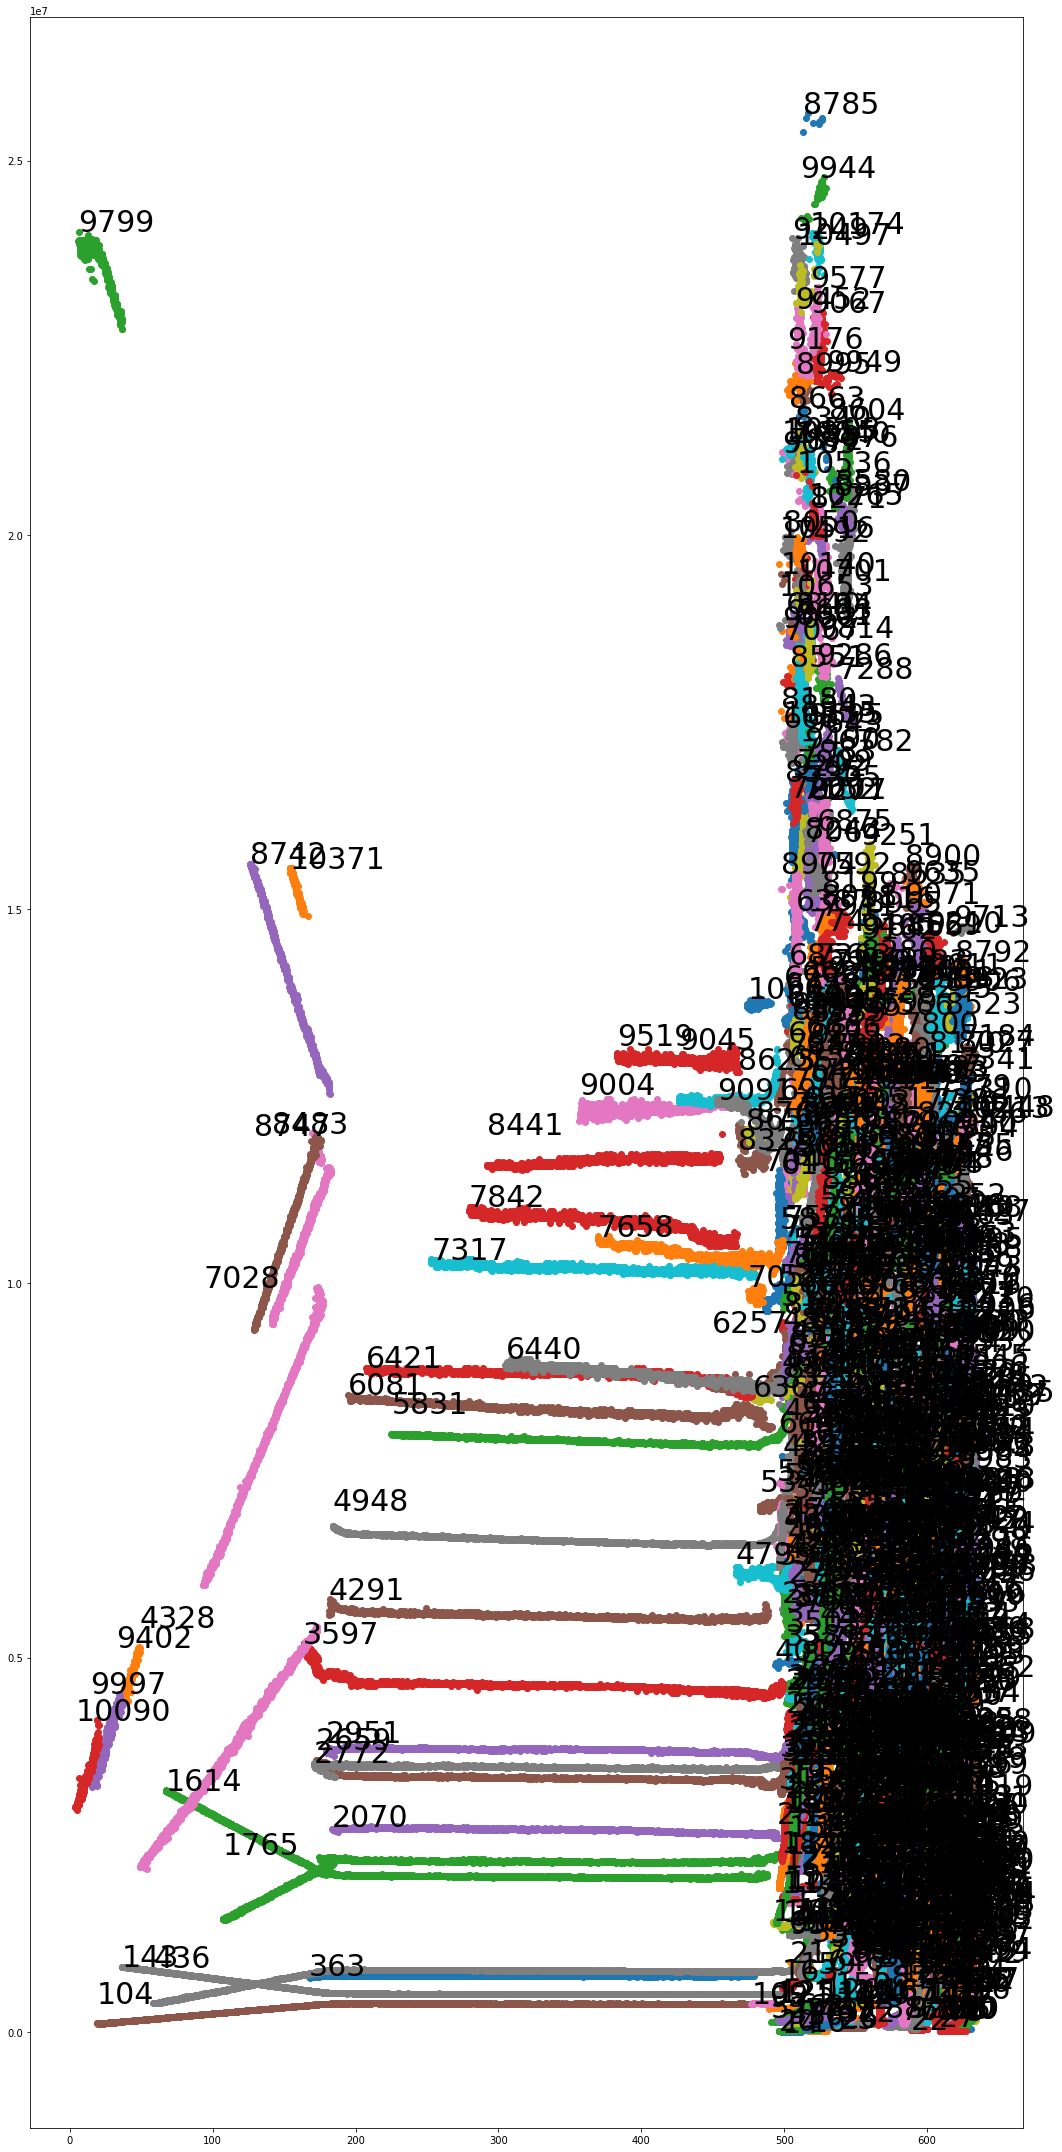

In [95]:
fig, ax = plt.subplots(1,figsize=(15,30))
i = 2
for p,trj_p in track.groupby("particle"):
    ax.plot(trj_p.x, trj_p.y*i, "o")
    ax.text(trj_p.x.min(), trj_p.y.max()*i,s = str(p), size = 30)
    i =i + 50 
plt.tight_layout()